# Import libraries

In [ ]:
#!git clone https://github.com/Vilmo18/apply_ML_AS.git
#!mv /content/apply_ML_AS/* /content/
#!rm -rf /content/apply_ML_AS

fatal: destination path 'apply_ML_AS' already exists and is not an empty directory.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import requests
import pickle
from sklearn.model_selection import train_test_split
#from apply_ML_AS.preprocessing import *
from utils import *



# Data Analysis

## Load data

## Look in our datasets

In [ ]:
#take a look at the training data
print('movies dataset shape : ',movies.shape)
print('rating dataset shape : ',ratings.shape)
print('link dataset shape : ',link.shape)
print('tags dataset shape : ',tags.shape,end="\n\n")

for df in [ratings, movies, link,tags]:
    print(df.head(3))
    print("++++++++++++++++++++")

#get a list of the features within the dataset
print("Movie : ", movies.columns,end="\n\n")
print("Rating : ", ratings.columns,end="\n\n")
print("Links : ", link.columns,end="\n\n")
print("Tags : ", tags.columns,end="\n\n")

movies.info()
ratings.info()
tags.info()

movies dataset shape :  (9742, 3)
rating dataset shape :  (100836, 4)
link dataset shape :  (9742, 3)
tags dataset shape :  (3683, 4)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
++++++++++++++++++++
   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
++++++++++++++++++++
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
++++++++++++++++++++
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445

In [ ]:
plot_rating(ratings)

In [ ]:
# Dropping the timestamp column from ratings and tags file
ratings.drop(columns='timestamp',inplace=True)
tags.drop(columns='timestamp',inplace=True)

In [ ]:
## We visalise film and genre with one encoding method
movie=movies
genres=[]
for i in range(len(movie.genres)):
    for x in movie.genres[i].split('|'):
        if x not in genres:
            genres.append(x)

len(genres)
for x in genres:
    movie[x] = 0
for i in range(len(movie.genres)):
    for x in movie.genres[i].split('|'):
        movie[x][i]=1
movie

Streaming output truncated to the last 5000 lines.
<ipython-input-68-e31f6b8d1217>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[x][i]=1
<ipython-input-68-e31f6b8d1217>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[x][i]=1
<ipython-input-68-e31f6b8d1217>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[x][i]=1
<ipython-input-68-e31f6b8d1217>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## We remove column genres
movie.drop(columns='genres',inplace=True)
movie.sort_index(inplace=True)

In [ ]:
movie

,movieId,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Children    				664
Comedy    				3756
Fantasy    				779
Romance    				1596
Drama    				4361
Action    				1828
Crime    				1199
Thriller    				1894
Horror    				978
Mystery    				573
Sci-Fi    				980
War    				382
Musical    				334
Documentary    				440
IMAX    				158
Western    				167
Film-Noir    				87
(no genres listed)    				34


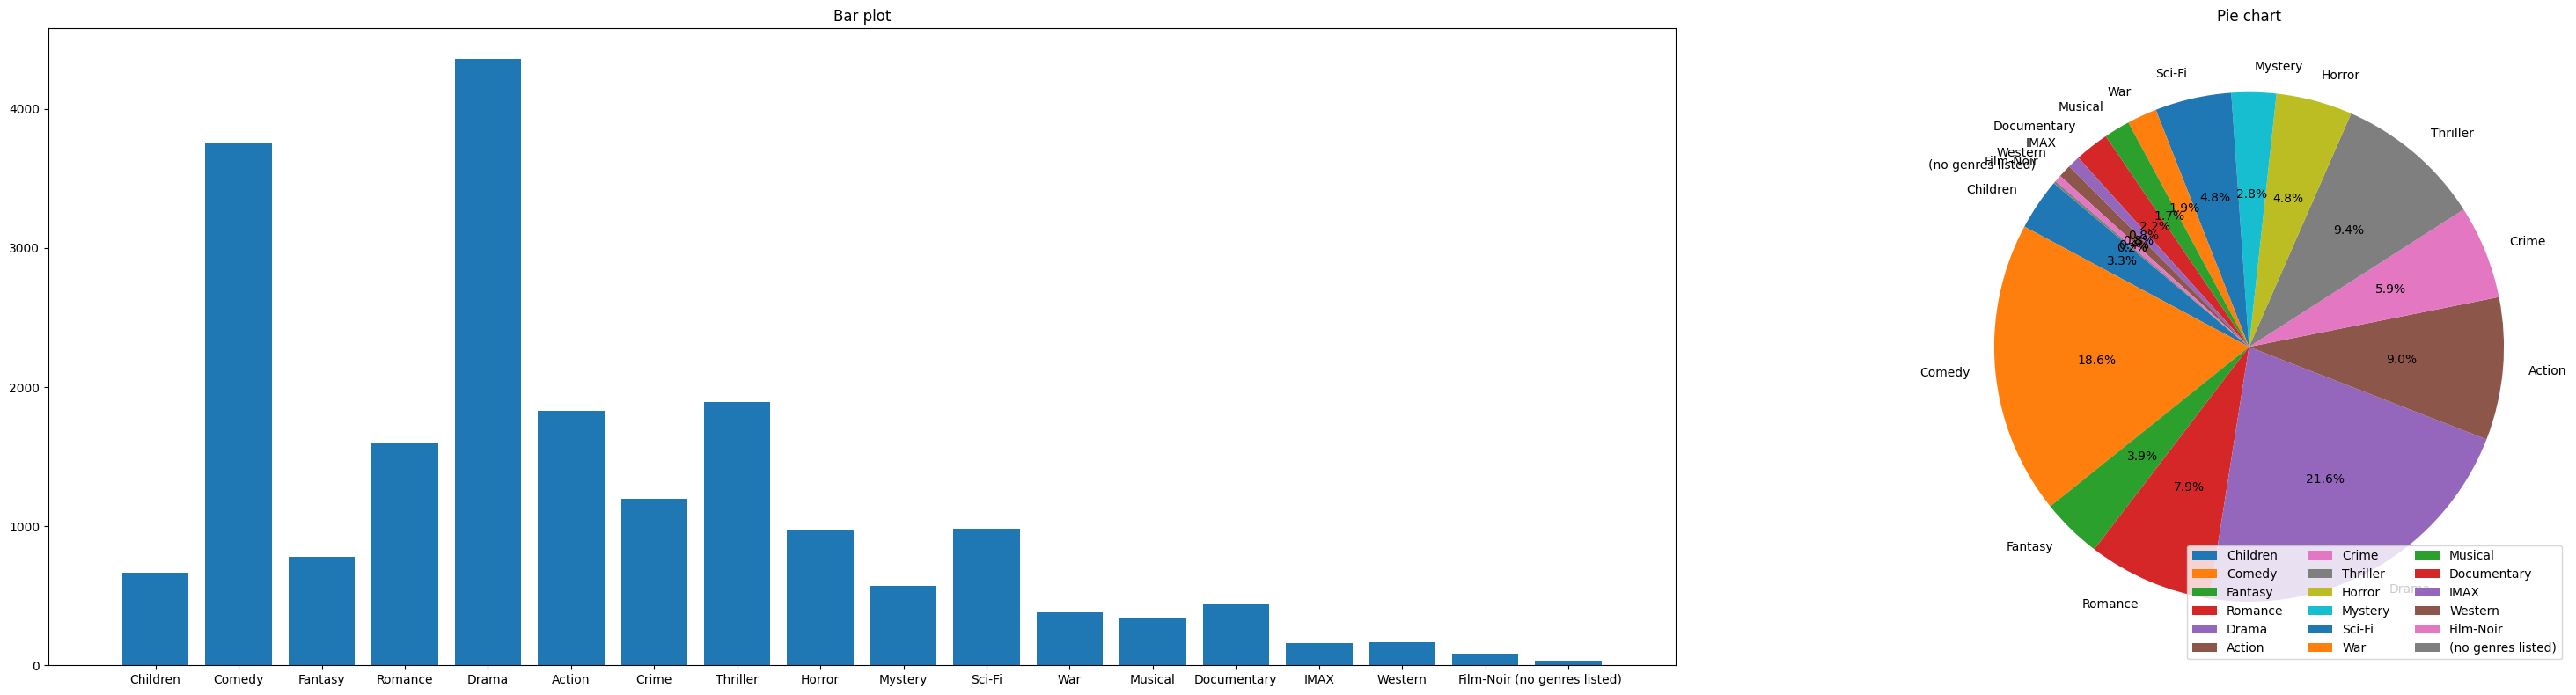

In [ ]:
x={}
for i in movie.columns[4:23]:
    x[i]=movie[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,x[i]))
## Plot the distribution of genre
plt.figure(figsize=(35, 8))

plt.subplot(1, 2, 1)
plt.bar(x.keys(), x.values())
plt.title('Bar plot')

plt.subplot(1, 2, 2)
plt.pie(x.values(), labels=x.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Pie chart')
plt.legend(x.keys(), loc="best",ncol=3)

plt.tight_layout()
plt.show()

In [ ]:
#Add a Column `rating` in movie DF and assign them with the Mean Movie Rating for that Movie.
x=ratings.groupby('movieId').rating.mean()
movie = pd.merge(movie,x,how='outer',on='movieId')
movie['rating'].fillna('0',inplace=True)

In [ ]:
# Now Lets group all the ratings with respect to movieId and count the no of Users
x = ratings.groupby('movieId',as_index=False).userId.count()
x.sort_values('userId',ascending=False,inplace=True)
y = pd.merge(movie,x,how='outer',on='movieId')
y.drop(columns=[i for i in movie.columns[2:22]],inplace=True)
y.sort_values(['userId','rating'],ascending=False)

,movieId,title,rating,userId
314,356,Forrest Gump (1994),4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",4.429022,317.0
257,296,Pulp Fiction (1994),4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",4.16129,279.0
1939,2571,"Matrix, The (1999)",4.192446,278.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),0,NaN
5824,32160,Twentieth Century (1934),0,NaN
5837,32371,Call Northside 777 (1948),0,NaN
5957,34482,"Browning Version, The (1951)",0,NaN


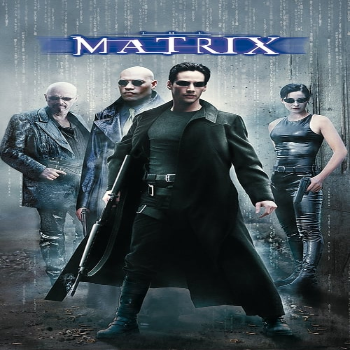

Matrix, The (1999)


In [ ]:
id=2571
display_image_title_movie(id,link,movies)

In [ ]:
#find the user with highest no.of. movie ratings and that users mean rating.
x = ratings.groupby('userId',as_index=False).movieId.count()
y = ratings.groupby('userId',as_index=False).rating.mean()
x = pd.merge(x,y,how='outer',on='userId')

In [ ]:
x.describe()

,userId,movieId,rating
count,610.000000,610.000000,610.000000
mean,305.500000,165.304918,3.657222
std,176.236111,269.480584,0.480635
min,1.000000,20.000000,1.275000
25%,153.250000,35.000000,3.360000
50%,305.500000,70.500000,3.694385
75%,457.750000,168.000000,3.997500
max,610.000000,2698.000000,5.000000


In [ ]:
x.sort_values('movieId',ascending=False)

,userId,movieId,rating
413,414,2698,3.391957
598,599,2478,2.642050
473,474,2108,3.398956
447,448,1864,2.847371
273,274,1346,3.235884
...,...,...,...
441,442,20,1.275000
568,569,20,4.000000
319,320,20,3.525000
575,576,20,3.100000


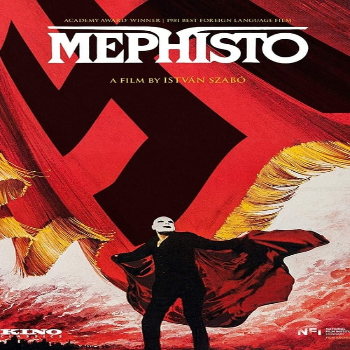

Mephisto (1981)


In [ ]:
display_image_title_movie(2075,link,movies)

# Preprocessing

In [5]:
movies = pd.read_csv('data/movies.csv')
link = pd.read_csv('data/links.csv')
ratings = pd.read_csv('data/ratings.csv')

In [6]:
display_image_title_movie(4993, link, movies)

succes


Lord of the Rings: The Fellowship of the Ring, The (2001)


In [21]:
dico = np.load('model/movies_mapping.npy', allow_pickle=True).item()

In [7]:
def get_data(folder):
    DIR = os.getcwd()
    data_path = f"{DIR}/DATA/{folder}"

    # Creating embedings if it yet to be saved in memeory
    if not (os.path.isfile(f"{data_path}/{compress_filename}")):

        # movies_df = pd.read_csv(f'{data_path}/movies.csv')
        ratings_df = pd.read_csv(f'{data_path}/ratings.csv')
        # tags_df = pd.read_csv(f'{data_path}/tags.csv')

        rating_arr = ratings_df[['userId','movieId','rating']].to_numpy()
        train , test, unique_user_ids, unique_movie_ids = train_test_split(rating_arr)

        #create Data embdings for user and items
        train_uv = create_UV(train,unique_user_ids, unique_movie_ids)
        test_uv = create_UV(test, unique_user_ids, unique_movie_ids)

        #saving embeddings
        data = save_embedings(train_uv,test_uv,data_path)
        train_uv = data['train']
        test_uv = data['test']
    else:
        data = read_embeddings(f"{data_path}/{compress_filename}")
        train_uv = data['train']
        test_uv = data['test']

    return train_uv, test_uv
def train_test_split(data,test=0.1,seed=42):
    user_ids, movie_ids, user_ratings = data.T

    # getting unique user IDs and movie IDs
    unique_user_ids = np.unique(user_ids)
    unique_movie_ids = np.unique(movie_ids)

    # Making Data random
    rng = np.random.default_rng(43)
    rng.shuffle(data)

    test_num = int(test * len(data))

    test = data[:test_num+1, :]
    train = data[test_num+1:, :]

    return train, test, unique_user_ids, unique_movie_ids
def create_UV(rating_arr,unique_user_ids,unique_movie_ids):

    #sorting according to user and movies
    user_sort = rating_arr[rating_arr[:, 0].argsort()]
    movies_sort = rating_arr[rating_arr[:, 1].argsort()]

    # separating user and movie IDs and ratings
    user_ids, user_movie_ids, user_ratings = user_sort.T
    movie_user_ids, movie_movie_ids, movie_ratings = movies_sort.T

    # getting unique user IDs and movie IDs
    # unique_user_ids = np.unique(user_ids)
    # unique_movie_ids = np.unique(movie_movie_ids)

    # mapping Ids to rating map
    user_to_idx = {int(user_id): idx for idx, user_id in enumerate(unique_user_ids)}
    movie_to_idx = {int(movie_id): idx for idx, movie_id in enumerate(unique_movie_ids)}

    # mapping
    user_to_rating = [[] for _ in unique_user_ids]
    movie_to_rating = [[] for _ in unique_movie_ids]

    for user_id, movie_id, rating in tqdm(zip(user_ids, user_movie_ids, user_ratings)):
        user_idx = user_to_idx[int(user_id)]
        movie_idx = movie_to_idx[int(movie_id)]
        user_to_rating[user_idx].append((movie_idx, rating))
        movie_to_rating[movie_idx].append((user_idx, rating))

    return user_to_idx, movie_to_idx, user_to_rating, movie_to_rating

In [22]:
rating_arr = ratings[['userId','movieId','rating']].to_numpy()
train , test, unique_user_ids, unique_movie_ids = train_test_split(rating_arr)

#create Data embdings for user and items
index_mapping_user,index_mapping_movie,users_train, movies_train = create_UV(train,unique_user_ids, unique_movie_ids)
_,_,users_test, movies_test = create_UV(test, unique_user_ids, unique_movie_ids)

22500085it [00:24, 925166.65it/s] 
2500010it [00:01, 1414209.68it/s]


## ALS with bias only

In [9]:
lamb=5
tau=0.4
gamma=2e-1
user_biases = np.zeros((len(index_mapping_user)))
item_biases = np.zeros((len(index_mapping_movie)))

M=len(index_mapping_user)
N= len(index_mapping_movie)

loss=[]
res=[]
cout1=[]
error=[]

In [10]:
def loss_cost_b_rms(users_map,users_vector,movies_vector,item_biases,user_biases,lamb,tau,gamma):
    result=0
    count=0
    M=len(users_map)
    for m in range(M):
      for (n,r) in users_map[m]:
        result+=(r-item_biases[n]-user_biases[m])**2
        count+=1
    loss=result*lamb
    loss+=gamma*(np.sum(item_biases**2))+gamma*np.sum((user_biases**2))
    loss=loss/2
    rms=np.sqrt(result/count)
    return loss,rms

In [ ]:
for _ in tqdm(range(30)):
    for m in range(M):
        biais = 0
        item_counter = 0
        for n, r in users_train[m]:
            biais += r - item_biases[n]
            item_counter += 1

        biais *= lamb
        biais = biais / (lamb * item_counter + gamma)
        user_biases[m] = biais

    for n in range(N):
        biais = 0
        user_counter = 0
        for m, r in movies_train[n]:
            biais += r - user_biases[m]
            user_counter += 1

        biais *= lamb
        biais = biais / (lamb * user_counter + gamma)
        item_biases[n] = biais

    cost, rms = loss_cost_b_rms(
        users_train,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    cost1, rms1 = loss_cost_b_rms(
        users_test,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    loss.append(cost)
    res.append(rms)
    cout1.append(cost1)
    error.append(rms1)
    print(rms)
    print(rms1)

### Training Loss

In [ ]:
plt.plot(loss)
plt.show()

### RMSE training

In [ ]:
plt.plot(res)
plt.plot(error)
plt.show()

## ALS with biases and latet vector

In [26]:
lamb=5
tau=0.4
gamma=2e-1
k=10

user_biases = np.zeros((len(index_mapping_user)))
item_biases = np.zeros((len(index_mapping_movie)))
users_vector=np.random.normal(0,1/np.sqrt(k),(len(index_mapping_user),k))
movies_vector=np.random.normal(0,1/np.sqrt(k),(k,len(index_mapping_movie)))

M=len(index_mapping_user)
N= len(index_mapping_movie)

loss=[]
res=[]
cout1=[]
error=[]


In [27]:
def loss_cost_rms(users_map,users_vector,movies_vector,item_biases,user_biases,lamb,tau,gamma):
    result=0
    count=0
    M=len(users_map)
    for m in range(M):
      for (n,r) in users_map[m]:
        result+=(r-np.dot(users_vector[m],movies_vector.T[n])-item_biases[n]-user_biases[m])**2
        count+=1
    loss=result*lamb
    loss+=gamma*(np.sum(item_biases**2))+gamma*np.sum((user_biases**2))+ tau*(np.einsum('ij,ij->',users_vector,users_vector)) + tau*(np.einsum('ij,ij->',movies_vector.T,movies_vector.T))
    loss=loss/2
    rms=np.sqrt(result/count)
    return loss,rms

In [ ]:
for _ in tqdm(range(40)):
    for m in range(M):
        biais = sum(
            [
                r - np.dot(users_vector[m], movies_vector.T[n]) - item_biases[n]
                for n, r in users_train[m]
            ]
        )
        item_counter = len(users_train[m])
        user_biases[m] = biais * lamb / (lamb * item_counter + gamma)
    for m in range(M):
        left_val = sum(
            [
                np.outer(movies_vector.T[n], movies_vector.T[n])
                for n, r in users_train[m]
            ]
        )
        right_val = sum(
            [
                movies_vector.T[n] * (r - user_biases[m] - item_biases[n])
                for n, r in users_train[m]
            ]
        )
        users_vector[m] = np.linalg.solve(
            left_val * lamb + tau * np.eye(k), lamb * right_val
        )
    for n in range(N):
        biais = sum(
            [
                r - np.dot(users_vector[m], movies_vector.T[n]) - user_biases[m]
                for m, r in movies_train[n]
            ]
        )
        user_counter = len(movies_train[n])
        item_biases[n] = biais * lamb / (lamb * user_counter + gamma)

    for n in range(N):
        left_val = sum(
            [np.outer(users_vector[m], users_vector[m]) for m, r in movies_train[n]]
        )
        right_val = sum(
            [
                users_vector[m] * (r - user_biases[m] - item_biases[n])
                for m, r in movies_train[n]
            ]
        )
        if len(movies_train[n]) > 0:
            movies_vector.T[n] = np.linalg.solve(
                left_val * lamb + tau * np.eye(k), lamb * right_val
            )

    cost, rms = loss_cost_rms(
        users_train,
        users_vector,
        movies_vector,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    cost1, rms1 = loss_cost_rms(
        users_test,
        users_vector,
        movies_vector,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    loss.append(cost)
    res.append(rms)
    cout1.append(cost1)
    error.append(rms1)
    print(rms)
    print(rms1)

In [28]:
for _ in tqdm(range(30)):
    for m in range(M):
        biais = 0
        item_counter = 0
        for n, r in users_train[m]:
            biais += r - np.dot(users_vector[m], movies_vector.T[n]) - item_biases[n]
            item_counter += 1

        biais *= lamb
        biais = biais / (lamb * item_counter + gamma)
        user_biases[m] = biais

    for m in range(M):
        left_val = 0
        right_val = 0

        for n, r in users_train[m]:
            left_val += movies_vector.T[n] * movies_vector.T[n].reshape(-1, 1)
            right_val += movies_vector.T[n] * (r - user_biases[m] - item_biases[n])

        left_val *= lamb
        users_vector[m] = np.linalg.solve(left_val + tau * np.eye(k), lamb * right_val)

    for n in range(N):
        biais = 0
        user_counter = 0
        for m, r in movies_train[n]:
            biais += r - np.dot(users_vector[m], movies_vector.T[n]) - user_biases[m]
            user_counter += 1

        biais *= lamb
        biais = biais / (lamb * user_counter + gamma)
        item_biases[n] = biais

    for n in range(N):
        left_val = 0
        right_val = 0
        if len(movies_train[n])>0:
          for m, r in movies_train[n]:
              left_val += users_vector[m] * users_vector[m].reshape(-1, 1)
              right_val += users_vector[m] * (r - user_biases[m] - item_biases[n])

          left_val *= lamb
          movies_vector.T[n] = np.linalg.solve(
              left_val + tau * np.eye(k), lamb * right_val
          )
    cost, rms = loss_cost_rms(
        users_train,
        users_vector,
        movies_vector,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    cost1, rms1 = loss_cost_rms(
        users_test,
        users_vector,
        movies_vector,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    loss.append(cost)
    res.append(rms)
    cout1.append(cost1)
    error.append(rms1)
    print(rms)
    print(rms1)


  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
plt.plot(loss)
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
loss1=np.load('curve/loss_als.npy')
res1=np.load('curve/rmse_train.npy')
error1=np.load('curve/rmse_val.npy')

In [ ]:
plt.plot(loss1,label='loss train')
plt.xlabel('epoch')
plt.ylabel('Loss')
pdf_filename = 'curve_pdf/loss_train.pdf'
plt.legend()
plt.savefig(pdf_filename, format='pdf')

In [11]:
#np.save('curve/loss_als.npy',loss)
#np.save('curve/rmse_train.npy',res)
#np.save('curve/rmse_val.npy',error)

In [ ]:
plt.plot(res1,label='RMSE train')
plt.plot(error1,label='RMSE test')
plt.xlabel('epoch')
plt.ylabel('RMSE')
pdf_filename = 'rmse_latent.pdf'
plt.legend()
plt.savefig(pdf_filename, format='pdf')

## ALS + ADDING FEATURE 

In [ ]:
genres = sorted(list(set('|'.join(list(movies["genres"])).split("|"))))#Get every genre in a list
#Attribute a number to each movie
dict_genres = dict(zip(genres, list(range(20))))#{'(no genres listed)': 0, 'Action': 1, 'Adventure': 2, 'Ani
#Encode genres per movie
features_per_movies = [[] for _ in range(N)]#a list of lists
for n in tqdm(range(N)):
  #get the features of the movie whose new id is i
  genres_per_movie = list(movies[movies["movieId"] == find_key_by_values(dico, n)]["genres"])[0].split("|")
  for g in genres_per_movie:
    # test_data_by_movie[movie_index][2][dict_genres[g]] = 1
    features_per_movies[n].append(dict_genres[g])#[dict_genres[g]] = 1

In [ ]:
#@title List of movies per feature
movies_with_feature_i = [[] for _ in range(20)]

#loop over feature
for i in range(20):
  #loop over movies
  for n in range(N):
    if i in features_per_movies[n]:
      movies_with_feature_i[i].append(n)

In [ ]:
def loss_func(train_data_by_user, user_vec, item_vec, user_biases, item_biases, feature_vec, tau, tau_feat, gamma, lambd):
  residual = 0
  count = 0
  for m in range(len(train_data_by_user)):
    movie_indices = train_data_by_user[m][0]
    r_m = np.array(train_data_by_user[m][1])
    count += len(movie_indices)
    residual += np.sum((r_m - (np.dot(user_vec[m].T, item_vec[movie_indices].T)+user_biases[m]+item_biases[movie_indices]))**2)

  feat_vec1 = np.array([np.sum(feature_vec[features_per_movies[n],:], axis=0)/np.sqrt(len(features_per_movies[n])) for n in range(N)])
  feat_vec2 = np.array([np.sum(feature_vec[features_per_movies[n],:], axis=0) for n in range(N)])
  loss = 0.5*lambd*residual + 0.5*tau*(np.sum(user_vec**2)+np.sum((item_vec - feat_vec1)**2)) + 0.5*tau_feat*np.sum(feat_vec2**2) + 0.5*gamma*(np.sum(user_biases**2)+np.sum(item_biases**2))
  rmse = np.sqrt(residual/count)
  return loss, rmse

In [ ]:
lamb=5
tau=0.4
gamma=2e-1
tau_feat=0.2
k=10
M=len(index_mapping_user)
N= len(index_mapping_movie)

user_biases = np.zeros((len(index_mapping_user)))
item_biases = np.zeros((len(index_mapping_movie)))
users_vector=np.random.normal(0,1/np.sqrt(k),(len(index_mapping_user),k))
movies_vector=np.random.normal(0,1/np.sqrt(k),(k,len(index_mapping_movie)))
feature_vec = np.random.normal(0, 1/np.sqrt(K), size=(20,k))

#Initialization
user_vec = np.random.normal(0, 1/np.sqrt(K), size= (M, K))
user_biases = np.zeros(M)
item_vec = np.random.normal(0, 1/np.sqrt(K), size=(N,K))
item_biases = np.zeros(N)

loss=[]
res=[]
cout1=[]
error=[]

In [ ]:
for _ in tqdm(range(30)):
    for m in range(M):
        biais = 0
        item_counter = 0
        for n, r in users_train[m]:
            biais += r - np.dot(users_vector[m], movies_vector.T[n]) - item_biases[n]
            item_counter += 1

        biais *= lamb
        biais = biais / (lamb * item_counter + gamma)
        user_biases[m] = biais

    for m in range(M):
        left_val = 0
        right_val = 0

        for n, r in users_train[m]:
            left_val += movies_vector.T[n] * movies_vector.T[n].reshape(-1, 1)
            right_val += movies_vector.T[n] * (r - user_biases[m] - item_biases[n])

        left_val *= lamb
        users_vector[m] = np.linalg.solve(left_val + tau * np.eye(k), lamb * right_val)

    for n in range(N):
        biais = 0
        user_counter = 0
        for m, r in movies_train[n]:
            biais += r - np.dot(users_vector[m], movies_vector.T[n]) - user_biases[m]
            user_counter += 1

        biais *= lamb
        biais = biais / (lamb * user_counter + gamma)
        item_biases[n] = biais

    for n in range(N):
        left_val = 0
        right_val = 0
        if len(movies_train[n])>0:
          for m, r in movies_train[n]:
              left_val += users_vector[m] * users_vector[m].reshape(-1, 1)
              right_val += users_vector[m] * (r - user_biases[m] - item_biases[n])

          left_val *= lamb
          movies_vector.T[n] = np.linalg.solve(
              left_val + tau * np.eye(k), lamb * right_val
          )


    for n in range(N):
        user_indices = movies_train[n][0]
        r_n = np.array(movies_train[n][1])
        term1 = lamb*np.dot(users_vector[user_indices].T, users_vector[user_indices])+tau*np.eye(k,k)
        term2 = r_n - user_biases[user_indices] - item_biases[n]
        term2 = lamb*np.sum(users_vector[user_indices]*term2.reshape(-1,1), axis=0)+tau_feat*np.sum(feature_vec[features_per_movies[n],:], axis=0)/np.sqrt(len(features_per_movies[n]))
        item_vec[n] = np.linalg.solve(term1, term2)
    #
    for i in range(20):
        denominator = tau_feat + tau* sum([1./np.sqrt(len(features_per_movies[n])) for n in movies_with_feature_i[i]])
        feature_vec[i,:] = tau*np.sum(item_vec[movies_with_feature_i[i],:], axis=0)/denominator


    
    cost, rms = loss_cost_rms(
        users_train,
        users_vector,
        movies_vector,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    cost1, rms1 = loss_cost_rms(
        users_test,
        users_vector,
        movies_vector,
        item_biases,
        user_biases,
        lamb,
        tau,
        gamma,
    )
    loss.append(cost)
    res.append(rms)
    cout1.append(cost1)
    error.append(rms1)
    print(rms)
    print(rms1)

## Prediction ALS +  Bias + latent_vector

In [11]:
users_predict=[(4887,5.0)]#4887 -5840  ###  (15522,5.0),(16696,5.0) harry
#lamb=5
#tau=0.4
#gamma=2e-1
#k=10

def generate_user_vector(users_predict,movies_vector,item_biases,lamb=lamb,tau=tau,gamma=gamma,iteration=1000,k=k):
    user_new = np.random.normal(0,1/np.sqrt(k), (k))
    user_bias_new = 0
    for _ in tqdm(range(iteration)):
        biais = 0
        item_counter = 0
        for n, r in users_predict:
            biais += r - np.dot(user_new, movies_vector.T[n]) - item_biases[n]
            item_counter += 1
        biais *= lamb
        biais = biais / (lamb * item_counter + gamma)
        user_bias_new = biais
        left_val = 0
        right_val = 0
        for n, r in users_predict:
            left_val += movies_vector.T[n] * movies_vector.T[n].reshape(-1, 1)
            right_val += movies_vector.T[n] * (r - user_bias_new - item_biases[n])
        left_val *= lamb
        user_new = np.linalg.solve(left_val + tau * np.eye(k), lamb * right_val)
    return user_new,user_bias_new

In [31]:
def find_key_by_values(dictionnaire, valeur_recherchee):
    for cle, valeur in dictionnaire.items():
        if valeur == valeur_recherchee:
            return cle
    raise ValueError("La valeur spécifiée n'existe pas dans le dictionnaire")

def prediction(user_new,user_bias_new,movies_vector,item_biases):
    def movie_ids_less_than_30_occurrences(dataframe):
        occurrences = dataframe.groupby('movieId').size().reset_index(name='occurrences')
        less_than_30_occurrences = occurrences[occurrences['occurrences'] < 20]['movieId'].tolist()
        return less_than_30_occurrences

    less_than_30_occurrences_ids = movie_ids_less_than_30_occurrences(ratings)
    n=movies_vector.shape[1]
    predict=[]
    for i in tqdm(range(n)):
        predict.append(np.dot(user_new, movies_vector.T[i]) +1*item_biases[i] + user_bias_new)
    recommender = np.argsort(predict)[::-1]
    recommender=recommender[:2000]
    rec=[]
    for i in recommender:
        key=find_key_by_values(index_mapping_movie,i)
        if key not in less_than_30_occurrences_ids:
            rec.append(key)
    return rec

In [32]:
user_new,user_bias_new=generate_user_vector(users_predict,movies_vector,item_biases)

100%|██████████| 1000/1000 [00:00<00:00, 33861.90it/s]


In [33]:
##array([48566, 23425, 30738, 28570, 57856, 43354, 58979, 38103, 38108,38243])
index=prediction(user_new,user_bias_new,movies_vector,item_biases)
for i in index:
    print(map_movie_id_title(i, movies),map_movie_id_genre(i, movies))

100%|██████████| 59047/59047 [00:00<00:00, 648813.16it/s]


Adanggaman (2000) Drama
Expelled from Paradise (2014) Animation|Sci-Fi
Young Detective Dee: Rise of the Sea Dragon (Di Renjie: Shen du long wang) (2013) Action|Adventure|Drama|Fantasy|Mystery|IMAX
Garbage Warrior (2007) Documentary
Shock Doctrine, The (2009) Documentary
Sea Is Watching, The (Umi wa miteita) (2002) Romance
Star Trek: Of Gods and Men (2007) Action|Adventure|Sci-Fi
Root of All Evil? (2006) Documentary
Culture High, The (2014) Documentary
Hukkle (2002) Crime|Drama|Mystery
Lord of the Rings: The Return of the King, The (2003) Action|Adventure|Drama|Fantasy
Lord of the Rings: The Fellowship of the Ring, The (2001) Adventure|Fantasy
Lord of the Rings: The Two Towers, The (2002) Adventure|Fantasy
William Shatner Presents: Chaos on the Bridge (2015) Documentary|Sci-Fi
Secret (2007) Drama|Fantasy|Romance
La Ronde (1950) Drama|Romance
Living with Michael Jackson (2003) Documentary
Last Cab to Darwin (2015) Drama
Forklift Driver Klaus: The First Day on the Job (2001) Comedy|Horror

# Plot rating distribution